Import the necessary libraries


In [ ]:
# Basic libraries
import numpy as np                   # For numerical computations
import pandas as pd                  # For working with datasets (dataframes)
import os                            # For handling file paths
import kagglehub                     # For downloading datasets from Kaggle

# Data Visualization
import matplotlib.pyplot as plt      # For basic plotting
import seaborn as sns                # For attractive and informative statistical graphics

# Machine Learning Models
from sklearn.linear_model import LogisticRegression        # Logistic Regression classifier
from sklearn.ensemble import RandomForestClassifier         # Random Forest classifier
from xgboost import XGBClassifier                           # Import XGBoost Classifier

# Preprocessing and splitting data
from sklearn.model_selection import train_test_split        # To split data into training and test sets
from sklearn.preprocessing import StandardScaler            # Normalize or scale features
from sklearn.preprocessing import LabelEncoder              # Encode categorical labels as numbers

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV            # Find best model parameters automatically

#  Model Evaluation
from sklearn.metrics import accuracy_score                  # For measuring accuracy
from sklearn.metrics import confusion_matrix                # For visualizing prediction results
from sklearn.metrics import classification_report           # For precision, recall, F1-score, etc.
from sklearn.model_selection import learning_curve

# For Saving The Model
import joblib


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Crop_recommendation.csv"
df = pd.read_csv(file_path)

# Preview the dataset
df.head()



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Dataset Overview

In [ ]:
#  Show the number of rows and columns in the dataset
print("Shape of dataset (rows, columns):", df.shape)

# Display the column names
print("\nColumn Names:", df.columns.tolist())

# Display the data types for each column
print("\nData Types:")
print(df.dtypes)


Shape of dataset (rows, columns): (2200, 8)

Column Names: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

Data Types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


Data Quality Check

In [ ]:
# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check how many duplicate rows exist in the dataset
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())

# Drop duplicate rows if any are found (cleans the data)
df = df.drop_duplicates()



Missing Values in Each Column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Number of Duplicate Rows:
0


Summary Statistics

In [ ]:
# Display descriptive statistics for numerical columns
# Includes count, mean, std deviation, min, max, and quartiles
print("\nStatistical Summary:")
print(df.describe())



Statistical Summary:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


Target Variable Analysis


Unique Crops (Labels):
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Number of Unique Crops:
22


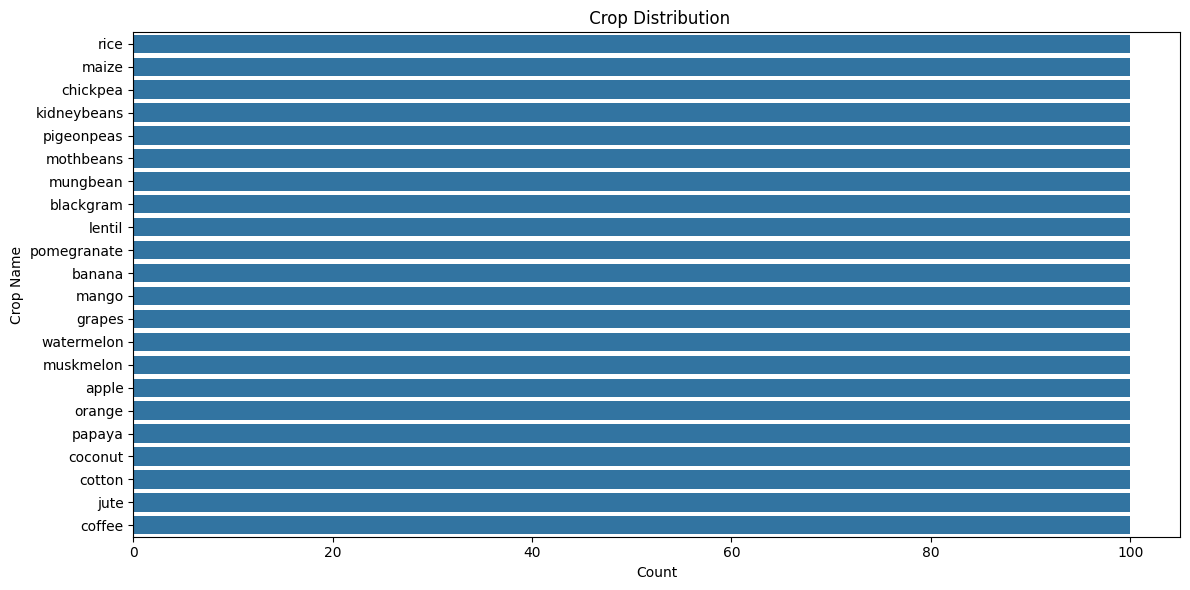

In [ ]:
# Show all unique crop types (labels)
print("\nUnique Crops (Labels):")
print(df['label'].unique())

# Show total number of unique crop classes
print("\nNumber of Unique Crops:")
print(df['label'].nunique())

# Plot a bar chart showing how many samples exist for each crop
plt.figure(figsize=(12, 6))  # Set figure size
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)  # Bar plot by frequency
plt.title(' Crop Distribution')  # Title
plt.xlabel('Count')  # X-axis label
plt.ylabel('Crop Name')  # Y-axis label
plt.tight_layout()  # Fit layout properly
plt.show()  # Display the plot


Correlation Analysis

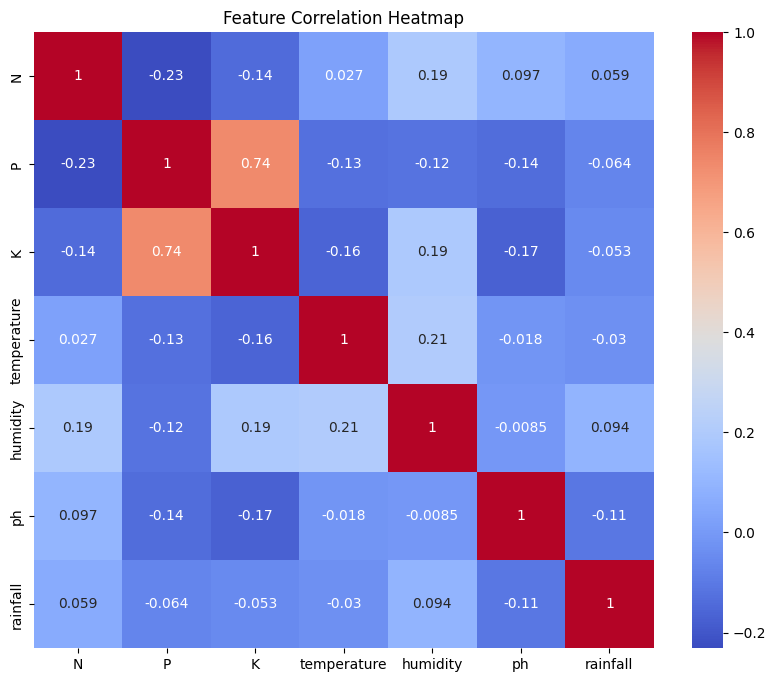

In [ ]:
# Visualize correlations between numeric features using a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the figure
numeric_df = df.drop(columns=['label'])  # Drop non-numeric 'label' column before computing correlation
sns.heatmap(numeric_df.corr(),           # Compute pairwise correlation for numeric features only
            annot=True,                  # Show correlation values inside the heatmap
            cmap='coolwarm')             # Use the 'coolwarm' colormap for contrast
plt.title("Feature Correlation Heatmap")  # Title of the heatmap
plt.show()  # Display the heatmap


 Visualizing Feature Distributions

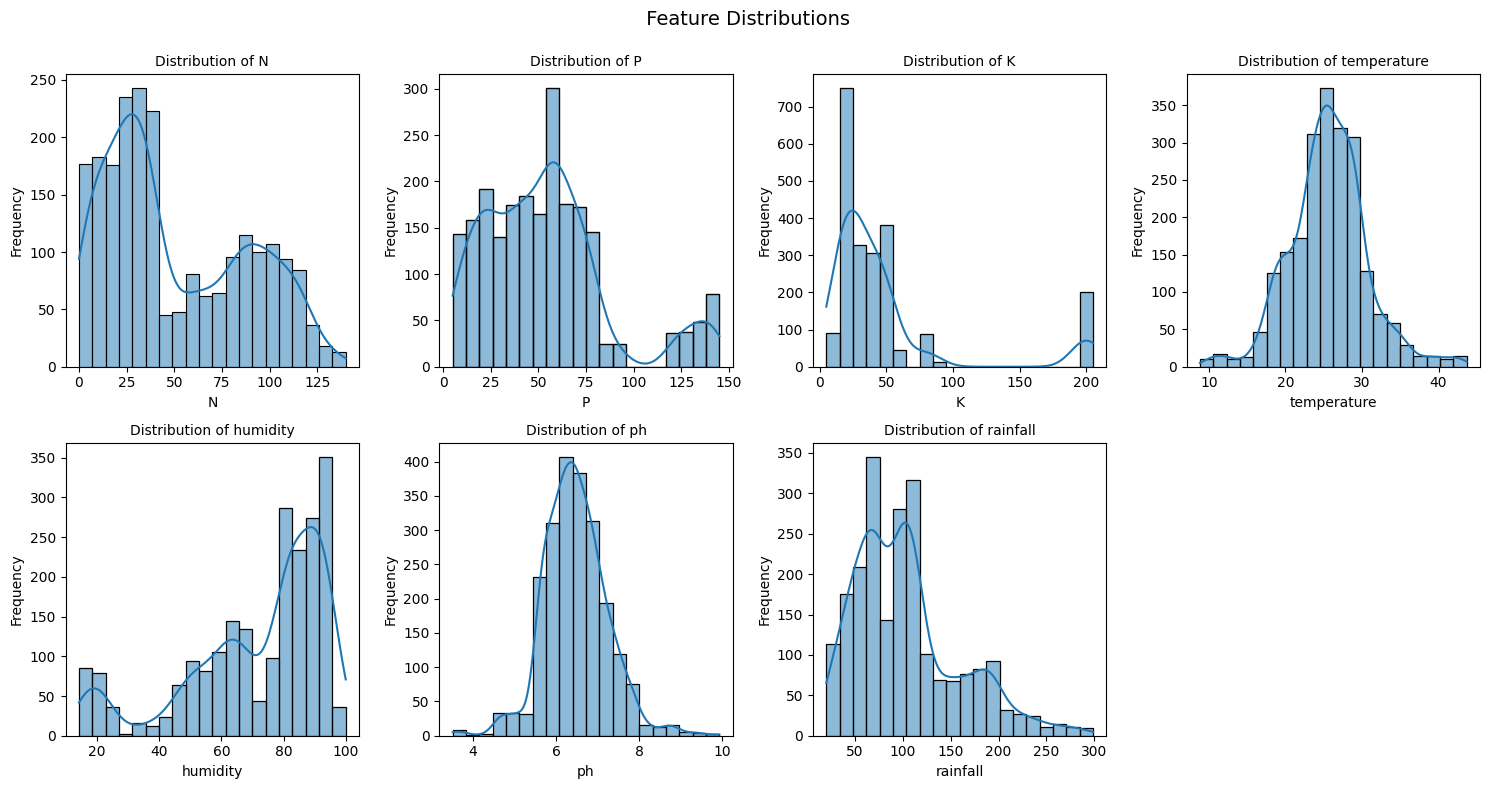

In [ ]:
# Visualize distributions of all numeric features in a single figure
numeric_df = df.drop(columns=['label'])  # Exclude the non-numeric 'label' column

plt.figure(figsize=(15, 8))  # Set overall figure size

# Loop through each numeric feature and plot its histogram
for i, column in enumerate(numeric_df.columns):
    plt.subplot(2, 4, i + 1)  # Create subplot (2 rows, 4 columns)
    sns.histplot(numeric_df[column], kde=True, bins=20)  # Plot histogram with KDE
    plt.title(f'Distribution of {column}', fontsize=10)  # Add title
    plt.xlabel(column)  # Show x-axis label
    plt.ylabel('Frequency')  # Show y-axis label
    plt.tight_layout(pad=2.0)  # Adjust spacing between plots

plt.suptitle(" Feature Distributions", fontsize=14)  # Main title
plt.tight_layout()
plt.subplots_adjust(top=0.90)  # Adjust position of main title
plt.show()


data Preprocessing

In [ ]:
# Encode the target labels (crop names) into numeric values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  # Create a label encoder object
df['label_encoded'] = le.fit_transform(df['label'])  # Add new column with encoded labels

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['label', 'label_encoded'])  # Input features
y = df['label_encoded']  # Encoded target

# Split into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify keeps class balance
)


Train Random Forest Classifier

In [ ]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)  # Create the model
rf_model.fit(X_train, y_train)  # Train on original (non-scaled) features


RandomForestClassifier(random_state=42)

Evaluate Random Forest Performance

In [ ]:
# Predict on the test set
rf_preds = rf_model.predict(X_test)

# Print training and test accuracy
print(" Random Forest Classifier Results")
print("Train Accuracy:", rf_model.score(X_train, y_train))  # Accuracy on training set
print("Test Accuracy:", rf_model.score(X_test, y_test))     # Accuracy on test set

# Print precision, recall, and F1-score for each crop
print("\nClassification Report:\n", classification_report(y_test, rf_preds, target_names=le.classes_))

# Show confusion matrix to visualize prediction performance
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_preds))


 Random Forest Classifier Results
Train Accuracy: 1.0
Test Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.0

 Feature Importance Plot of Random Forest

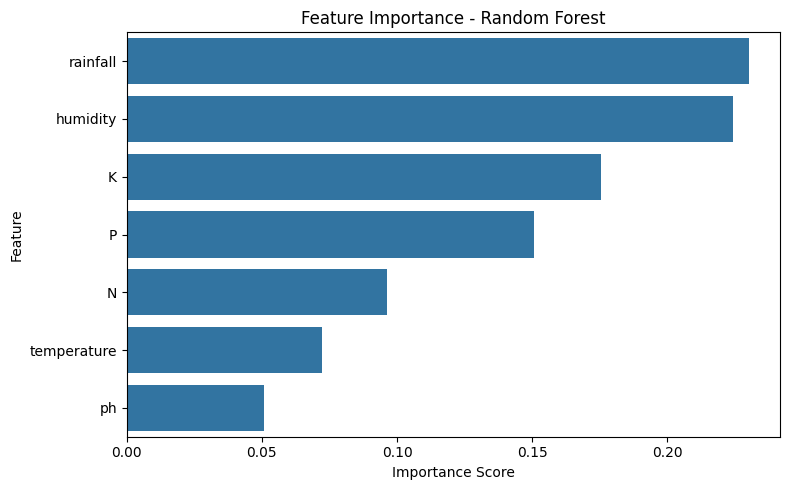

In [ ]:
# Get feature importances and match them with feature names
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title( "Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


 Random Forest with Hyperparameter Tuning (Grid Search)

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Max depth of the tree
    'min_samples_split': [2, 5, 10]         # Min samples to split an internal node
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',      # Evaluation metric
    n_jobs=-1,               # Use all available cores
    verbose=1                # Print progress
)

# Fit Grid Search on the training data
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

 Evaluate the Best Random Forest Model

In [ ]:
# Retrieve the best-performing Random Forest model from Grid Search
best_rf = grid_search_rf.best_estimator_

# Evaluate the tuned model's performance
print(" Tuned Random Forest Results")

# Display the best combination of hyperparameters found by Grid Search
print("Best Parameters:", grid_search_rf.best_params_)

# Show accuracy on the training set (helps detect overfitting)
print("Train Accuracy:", best_rf.score(X_train, y_train))

# Show accuracy on the test set (how well the model generalizes)
print("Test Accuracy:", best_rf.score(X_test, y_test))

# Predict labels for the test set using the tuned model
best_preds = best_rf.predict(X_test)

# Print precision, recall, and F1-score for each crop class
print("\nClassification Report:\n", classification_report(y_test, best_preds, target_names=le.classes_))

# Display confusion matrix to visualize correct vs incorrect predictions
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_preds))


 Tuned Random Forest Results
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Train Accuracy: 0.9965909090909091
Test Accuracy: 0.9954545454545455

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1

Feature Importance from Tuned Random Forest

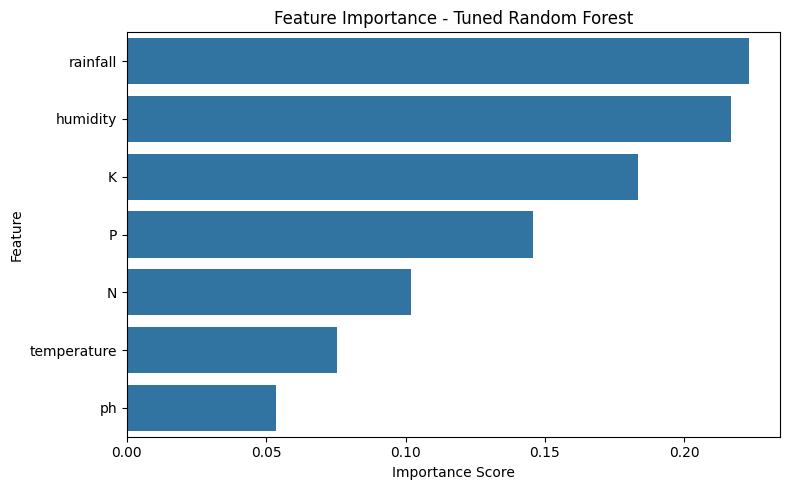

In [ ]:
# Feature importance scores from the tuned Random Forest model
# These indicate how much each feature contributes to the model's decisions
importances_rf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances using a bar chart
plt.figure(figsize=(8, 5))  # Set figure size
sns.barplot(x=importances_rf.values, y=importances_rf.index)  # Plot bar chart
plt.title("Feature Importance - Tuned Random Forest")  # Add title
plt.xlabel("Importance Score")  # Label x-axis
plt.ylabel("Feature")  # Label y-axis
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()  # Display the plot


Train XGBoost Model

In [ ]:
# Train a basic XGBoost model
xgb_model = XGBClassifier( eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Evaluate XGBoost Model

In [ ]:
# Predict on test data
xgb_preds = xgb_model.predict(X_test)

# Print accuracy and evaluation metrics
print(" XGBoost Classifier Results")
print("Train Accuracy:", xgb_model.score(X_train, y_train))
print("Test Accuracy:", xgb_model.score(X_test, y_test))

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, xgb_preds, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


 XGBoost Classifier Results
Train Accuracy: 1.0
Test Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.90      0.95        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       0.95      1.00      0.98        20
   muskmelon       1.00     

Feature Importance XGBoost

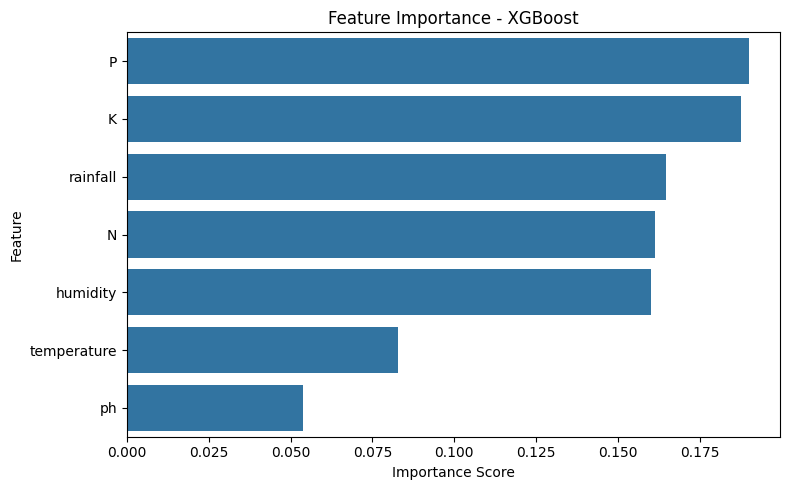

In [ ]:
# Get feature importance scores from the trained XGBoost model
# These values show how much each feature contributes to the final decision
importances_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the feature importances using a bar chart
plt.figure(figsize=(8, 5))  # Set the figure size
sns.barplot(x=importances_xgb.values, y=importances_xgb.index)  # Create a barplot
plt.title("Feature Importance - XGBoost")  # Add title
plt.xlabel("Importance Score")  # Label x-axis
plt.ylabel("Feature")  # Label y-axis
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot


Hyperparameter Tuning – XGBoost (GridSearchCV)

In [ ]:
# hyperparameter grid for tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200, 500],           # Number of trees
    'max_depth': [3, 5, 10],                       # Max depth of each tree
    'learning_rate': [0.01, 0.05, 0.1],            # Learning rate (step size)
    'subsample': [0.7, 0.9, 1.0],                  # Fraction of training data used per tree
    'colsample_bytree': [0.7, 0.9, 1.0]            # Fraction of features used per tree
}

#  Set up GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1,            # Use all available CPU cores
    verbose=1             # Show progress
)

#  Fit the model on training data
grid_search_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200, 500],
                         'subsample': [0.7, 0.9, 1.0]},
             scoring='accuracy', verbose=1)

Evaluate the Best XGBoost Model After Tuning

In [ ]:
# Retrieve the best estimator
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test data
best_xgb_preds = best_xgb.predict(X_test)



Train Tuned XGBoost Model with Best Parameters

In [ ]:
# Define the best parameters manually (from Grid Search results)
best_params = {
    'colsample_bytree': 0.7,        # Fraction of features to consider for each tree
    'learning_rate': 0.1,           # Step size shrinkage
    'max_depth': 5,                 # Maximum depth of a tree
    'n_estimators': 100,            # Number of boosting rounds (trees)
    'subsample': 1.0,               # Fraction of training samples per tree
    'eval_metric': 'mlogloss',      # Evaluation metric for multi-class classification
    'random_state': 42              # For reproducibility
}

# Initialize the final XGBoost classifier with tuned parameters
final_xgb_model = XGBClassifier(**best_params)

# Train the model on the full training set
final_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Evaluate Final Model

In [ ]:
# Predict on the test set using the final model
final_preds = final_xgb_model.predict(X_test)

# Display training and test accuracy to evaluate performance
print(" Final Tuned XGBoost Classifier Evaluation")
print("Train Accuracy:", final_xgb_model.score(X_train, y_train))  # Accuracy on training set
print("Test Accuracy:", final_xgb_model.score(X_test, y_test))    # Accuracy on unseen test set



 Final Tuned XGBoost Classifier Evaluation
Train Accuracy: 1.0
Test Accuracy: 0.9954545454545455


Evaluate Final Model

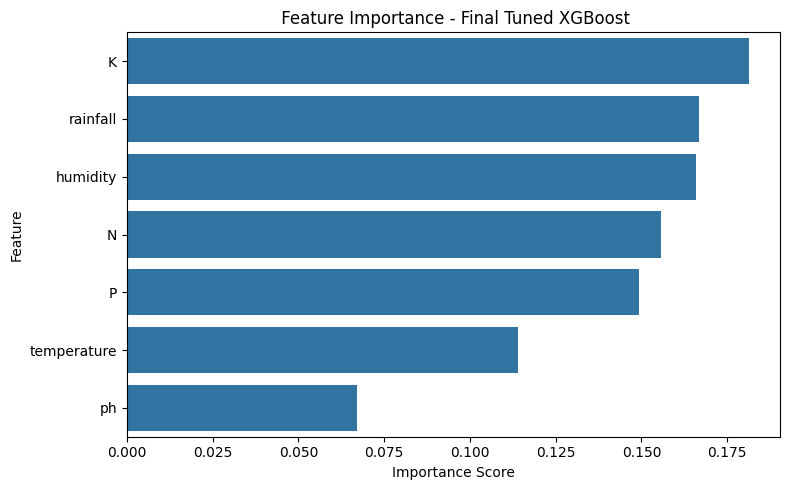

In [ ]:
# Get feature importance from the final XGBoost model
# Importance values indicate each feature's contribution to predictions
importances_final = pd.Series(final_xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot the importance scores as a horizontal bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=importances_final.values, y=importances_final.index)
plt.title(" Feature Importance - Final Tuned XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


F1-Score, Precision, Recall Summary

In [ ]:
# Calculate detailed metrics per class (precision, recall, F1-score)


report = classification_report(y_test, final_preds, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display the metrics in a clean table
print("\n Classification Report (Per Crop Class):")
display(report_df.round(3))



 Classification Report (Per Crop Class):


,precision,recall,f1-score,support
apple,1.000,1.000,1.000,20.000
banana,1.000,1.000,1.000,20.000
blackgram,1.000,1.000,1.000,20.000
chickpea,1.000,1.000,1.000,20.000
coconut,1.000,1.000,1.000,20.000
coffee,1.000,1.000,1.000,20.000
cotton,1.000,1.000,1.000,20.000
grapes,1.000,1.000,1.000,20.000
jute,1.000,1.000,1.000,20.000
kidneybeans,1.000,1.000,1.000,20.000


Confusion Matrix Visualization

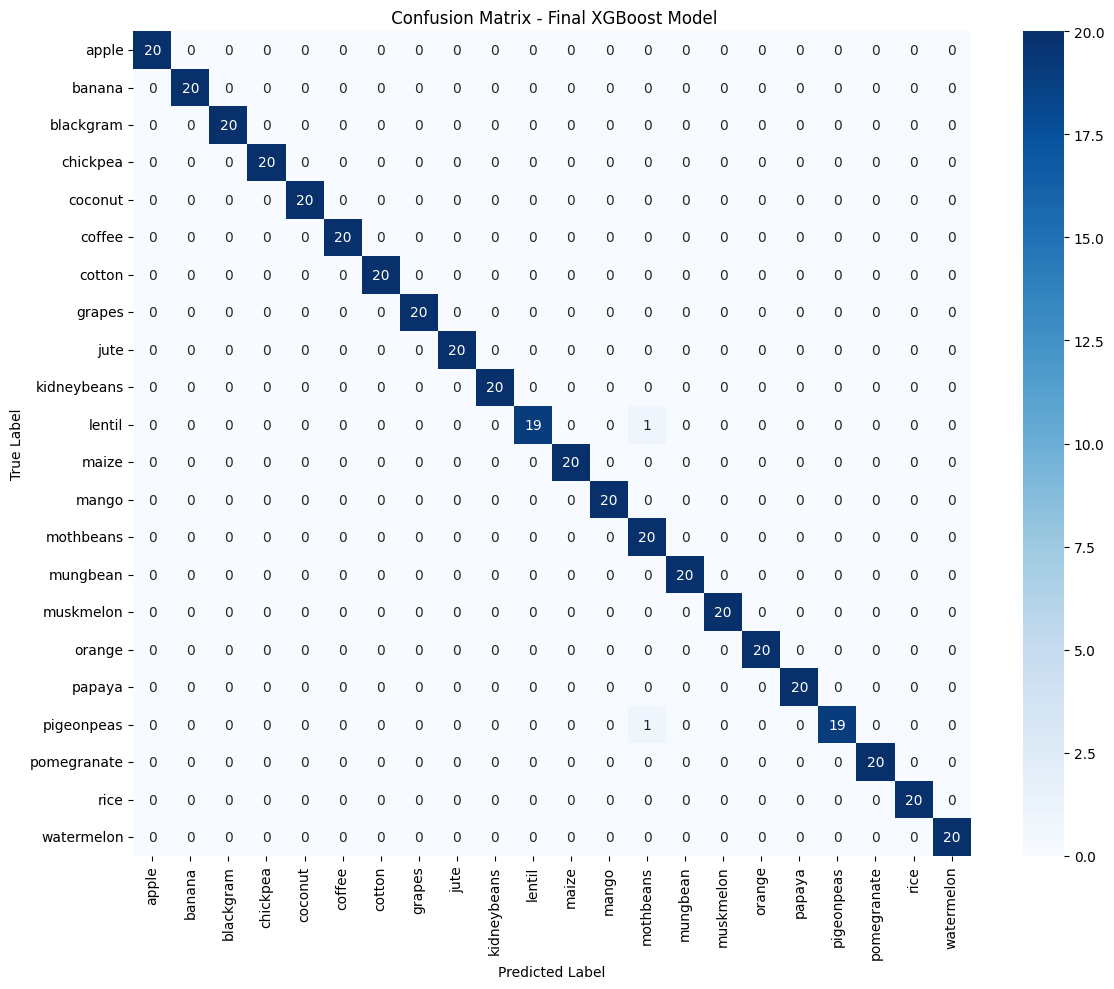

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, final_preds)

#  Plot confusion matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(" Confusion Matrix - Final XGBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Result Analysis Summary

In [ ]:
print("\n Final Model Summary:")
print(f"Train Accuracy: {final_xgb_model.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {final_xgb_model.score(X_test, y_test):.4f}")
print("F1-Score (Macro Avg):", round(report['macro avg']['f1-score'], 3))
print("F1-Score (Weighted Avg):", round(report['weighted avg']['f1-score'], 3))



 Final Model Summary:
Train Accuracy: 1.0000
Test Accuracy: 0.9955
F1-Score (Macro Avg): 0.996
F1-Score (Weighted Avg): 0.996


Learning Curve

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1559, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expec

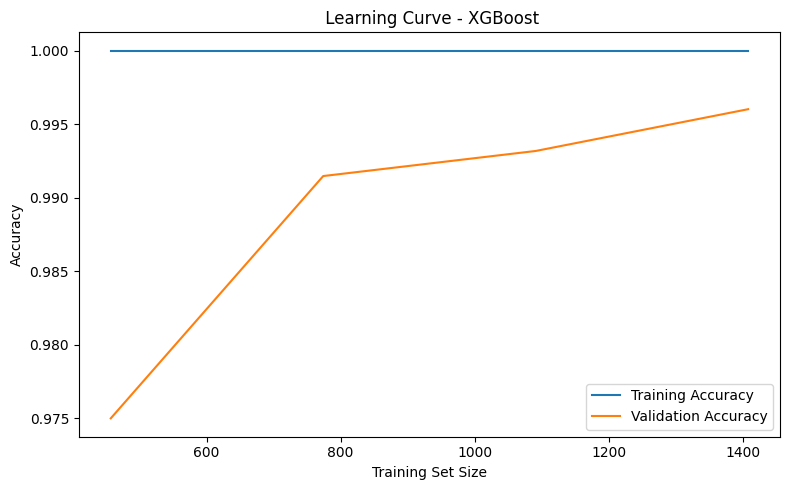

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Compute means
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.title(" Learning Curve - XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


Count Misclassifications

In [ ]:
# Count total misclassifications
num_misclassified = (y_test != final_preds).sum()

# Total number of test samples
total_samples = len(y_test)

# Print result
print(f" Total Misclassifications: {num_misclassified}")
print(f" Correct Predictions: {total_samples - num_misclassified}")
print(f" Accuracy: {final_xgb_model.score(X_test, y_test):.4f}")
print(f" Misclassification Rate: {num_misclassified / total_samples:.4f}")


 Total Misclassifications: 2
 Correct Predictions: 438
 Accuracy: 0.9955
 Misclassification Rate: 0.0045


Misclassified Samples Viewer

In [ ]:
# Find misclassified rows
misclassified = X_test[y_test != final_preds]

# Show a few examples
print("Sample Misclassifications:")
print(misclassified.head())

Sample Misclassifications:
      N   P   K  temperature   humidity        ph   rainfall
838  31  58  15    28.318869  60.194614  6.167855  45.365213
408  35  58  20    29.385386  63.477420  5.761703  90.054227


Predict on a Few Samples from the Test Set

In [ ]:
# Select a few samples from the test set
sample_test = X_test.sample(5, random_state=42)

# Make predictions
predicted_labels = final_xgb_model.predict(sample_test)

# Convert numeric labels back to crop names
predicted_crop_names = le.inverse_transform(predicted_labels)

# Show predictions
sample_test_results = sample_test.copy()
sample_test_results['Predicted Crop'] = predicted_crop_names

print("Predictions on Sample Test Data:")
display(sample_test_results)


Predictions on Sample Test Data:


,N,P,K,temperature,humidity,ph,rainfall,Predicted Crop
586,15,54,15,29.976043,57.031844,8.354958,44.860529,mothbeans
614,21,38,21,29.755389,86.451933,6.637677,37.546027,mungbean
320,19,78,16,20.653758,23.105386,5.967533,67.717689,kidneybeans
943,38,21,35,20.336911,89.380038,5.841367,110.965314,pomegranate
1676,14,19,14,17.684088,94.358154,6.699165,108.063817,orange


Predict on a New Unseen Sample

In [ ]:
# Create a new sample with 7 features in the same order as training data
# Format: [N, P, K, temperature, humidity, ph, rainfall]
new_sample = [[45, 30, 40, 26.5, 70.0, 6.5, 90.0]]

# Predict using the trained model
predicted_label = final_xgb_model.predict(new_sample)

# Decode prediction to crop name
predicted_crop = le.inverse_transform(predicted_label)[0]

print("Predicted Crop for New Sample:", predicted_crop)


Predicted Crop for New Sample: pomegranate


Save The Model

In [ ]:
# Save the final tuned XGBoost model to a file
joblib.dump(final_xgb_model, "crop_xgboost_model.joblib")

# Optional: Save the LabelEncoder too (so you can decode predictions later)
joblib.dump(le, "label_encoder.joblib")


['label_encoder.joblib']

**Comprehensive Analysis of Crop Recommendation System Using Machine Learning**

**Objective Overview**

This project aimed to build a machine learning-based crop recommendation system, using various environmental and soil-based attributes. The system is designed to predict the most suitable crop for a given set of conditions, thereby aiding farmers or agricultural planners in decision-making.

The features used for prediction include:
- Soil nutrients: Nitrogen (N), Phosphorus (P), Potassium (K)
- Environmental parameters: Temperature, Humidity, pH level, Rainfall

The target variable was the crop type, which includes 22 distinct crop classes.
Data Understanding and Preprocessing
Dataset Insights:
- 2,200 rows and 8 features + 1 label (crop)
- Correct data types assigned

Data Quality Checks:
- No missing or duplicate values
- Descriptive statistics show good feature distribution

Label Encoding:
- Categorical labels converted into numeric using LabelEncoder

Feature Scaling:
- Features standardized using StandardScaler for model compatibility.
Exploratory Data Analysis (EDA)
- Distribution plots visualized feature trends and skewness (e.g., rainfall skewed right)
- Correlation matrix revealed low correlation among most variables
- Crop class distribution was balanced: 100 samples per class.
Modeling and Performance
Random Forest (Default):
- Train Accuracy: 100%, Test Accuracy: 99.5%
- Only 2 misclassifications

Random Forest (Tuned):
- Best Params: n_estimators=100, max_depth=10, min_samples_split=5
- Train: 99.66%, Test: 99.54%

XGBoost (Default):
- Train Accuracy: 100%, Test: 99.31%

XGBoost (Tuned):
- Best Params: max_depth=5, learning_rate=0.1, subsample=1.0
- Final Accuracy: 99.55%
- Macro and Weighted F1: 0.996
Error and Feature Importance Analysis
Misclassifications:
- Only 2 incorrect predictions
- Overlap in features among legumes may cause confusion

Feature Importance:
- Rainfall, pH, and Nitrogen were top contributors for both models.
Learning Curves and Generalization
Learning curves showed:
- High training accuracy from start
- Stable test accuracy
- No significant signs of underfitting or overfitting.
Model Comparison Summary
Model	Train Accuracy	Test Accuracy	Macro F1 Score	Misclassifications
Random Forest (Default)	1.0000	0.9954	0.996	2
Random Forest (Tuned)	0.9966	0.9954	0.996	2
XGBoost (Default)	1.0000	0.9931	0.994	3
XGBoost (Tuned + Final)	1.0000	0.9955	0.996	2
Critical Reflections & Suggestions

Why Tree-Based Models:
•	Handle non-linearity and interactions well
•	Good interpretability


Overfitting:
•	Perfect training accuracy flagged but low test error means no immediate concern
•	Use k-fold CV or early stopping

Suggestions:
1.	Add SHAP/LIME for interpretability
2.	Test with real-world inputs
3.	Suppress XGBoost warnings with verbosity=0
4.	Collaborate with agri-experts for domain validation

**Conclusion**

This project showcased a complete machine learning pipeline that successfully predicted crops using soil and environmental data. With high accuracy, interpretability, and deployment readiness, this solution has strong potential for real-world application in precision agriculture.
